In [1]:
#pip install pandas-datareader

In [2]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

folders = [ 'SPX_Q1', 'SPX_Q2', 'SPX_Q3', 'SPX_Q4']

dfs = []

for folder in folders:
    folder_path = os.path.join('SPX/', folder)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        filtered_df = df[df[' [DTE]'] == 7]
        dfs.append(filtered_df)

merged_df = pd.concat(dfs)
merged_df.head()

,[QUOTE_UNIXTIME],[QUOTE_READTIME],[QUOTE_DATE],[QUOTE_TIME_HOURS],[UNDERLYING_LAST],[EXPIRE_DATE],[EXPIRE_UNIX],[DTE],[C_DELTA],[C_GAMMA],...,[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],[P_VOLUME],[STRIKE_DISTANCE],[STRIKE_DISTANCE_PCT]
794,1672866000,2023-01-04 16:00,2023-01-04,16.0,3853.39,2023-01-11,1673470800,7.0,1.0,0.0,...,0.0,0.0,0.0,0.00176,-0.01785,-0.00023,2.560080,,2853.4,0.740
795,1672866000,2023-01-04 16:00,2023-01-04,16.0,3853.39,2023-01-11,1673470800,7.0,1.0,0.0,...,0.0,-0.00041,0.0,0.0016,-0.01773,-0.00054,2.220070,,2653.4,0.689
796,1672866000,2023-01-04 16:00,2023-01-04,16.0,3853.39,2023-01-11,1673470800,7.0,1.0,0.0,...,0.0,0.0,0.0,0.00168,-0.01682,0.0,1.933810,,2453.4,0.637
797,1672866000,2023-01-04 16:00,2023-01-04,16.0,3853.39,2023-01-11,1673470800,7.0,1.0,0.0,...,0.0,0.0,0.0,0.00226,-0.01734,-0.00055,1.687580,,2253.4,0.585
798,1672866000,2023-01-04 16:00,2023-01-04,16.0,3853.39,2023-01-11,1673470800,7.0,1.0,0.0,...,0.0,-0.00035,0.0,0.00232,-0.01689,-0.00016,1.469090,,2053.4,0.533


In [3]:
merged_df.columns = merged_df.columns.str.strip()
merged_df['[QUOTE_DATE]'] = pd.to_datetime(merged_df['[QUOTE_DATE]'])
start_date = merged_df['[QUOTE_DATE]'].min()
end_date = merged_df['[QUOTE_DATE]'].max()
print("Start Date: ", start_date, " End Date: ", end_date)

Start Date:  2023-01-04 00:00:00  End Date:  2023-12-29 00:00:00


In [4]:
merged_df.isnull().sum()

[QUOTE_UNIXTIME]         0
[QUOTE_READTIME]         0
[QUOTE_DATE]             0
[QUOTE_TIME_HOURS]       0
[UNDERLYING_LAST]        0
[EXPIRE_DATE]            0
[EXPIRE_UNIX]            0
[DTE]                    0
[C_DELTA]                0
[C_GAMMA]                0
[C_VEGA]                 0
[C_THETA]                0
[C_RHO]                  0
[C_IV]                   0
[C_VOLUME]               0
[C_LAST]                 0
[C_SIZE]                 0
[C_BID]                  0
[C_ASK]                  0
[STRIKE]                 0
[P_BID]                  0
[P_ASK]                  0
[P_SIZE]                 0
[P_LAST]                 0
[P_DELTA]                0
[P_GAMMA]                0
[P_VEGA]                 0
[P_THETA]                0
[P_RHO]                  0
[P_IV]                   0
[P_VOLUME]               0
[STRIKE_DISTANCE]        0
[STRIKE_DISTANCE_PCT]    0
dtype: int64

In [5]:
merged_df.isna().sum()

[QUOTE_UNIXTIME]         0
[QUOTE_READTIME]         0
[QUOTE_DATE]             0
[QUOTE_TIME_HOURS]       0
[UNDERLYING_LAST]        0
[EXPIRE_DATE]            0
[EXPIRE_UNIX]            0
[DTE]                    0
[C_DELTA]                0
[C_GAMMA]                0
[C_VEGA]                 0
[C_THETA]                0
[C_RHO]                  0
[C_IV]                   0
[C_VOLUME]               0
[C_LAST]                 0
[C_SIZE]                 0
[C_BID]                  0
[C_ASK]                  0
[STRIKE]                 0
[P_BID]                  0
[P_ASK]                  0
[P_SIZE]                 0
[P_LAST]                 0
[P_DELTA]                0
[P_GAMMA]                0
[P_VEGA]                 0
[P_THETA]                0
[P_RHO]                  0
[P_IV]                   0
[P_VOLUME]               0
[STRIKE_DISTANCE]        0
[STRIKE_DISTANCE_PCT]    0
dtype: int64

In [6]:
import pandas_datareader.data as web


risk_free_rate_data = web.DataReader('DTB3', 'fred', start_date, end_date)
risk_free_rate_data.index

DatetimeIndex(['2023-01-04', '2023-01-05', '2023-01-06', '2023-01-09',
               '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13',
               '2023-01-16', '2023-01-17',
               ...
               '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21',
               '2023-12-22', '2023-12-25', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='DATE', length=258, freq=None)

In [7]:
df_final = merged_df.merge(risk_free_rate_data, how= 'left', left_on='[QUOTE_DATE]', right_index= True)
df_final['DTB3'] = df_final['DTB3'].fillna(method = 'bfill')
df_final.head()

,[QUOTE_UNIXTIME],[QUOTE_READTIME],[QUOTE_DATE],[QUOTE_TIME_HOURS],[UNDERLYING_LAST],[EXPIRE_DATE],[EXPIRE_UNIX],[DTE],[C_DELTA],[C_GAMMA],...,[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],[P_VOLUME],[STRIKE_DISTANCE],[STRIKE_DISTANCE_PCT],DTB3
794,1672866000,2023-01-04 16:00,2023-01-04,16.0,3853.39,2023-01-11,1673470800,7.0,1.0,0.0,...,0.0,0.0,0.00176,-0.01785,-0.00023,2.560080,,2853.4,0.740,4.41
795,1672866000,2023-01-04 16:00,2023-01-04,16.0,3853.39,2023-01-11,1673470800,7.0,1.0,0.0,...,-0.00041,0.0,0.0016,-0.01773,-0.00054,2.220070,,2653.4,0.689,4.41
796,1672866000,2023-01-04 16:00,2023-01-04,16.0,3853.39,2023-01-11,1673470800,7.0,1.0,0.0,...,0.0,0.0,0.00168,-0.01682,0.0,1.933810,,2453.4,0.637,4.41
797,1672866000,2023-01-04 16:00,2023-01-04,16.0,3853.39,2023-01-11,1673470800,7.0,1.0,0.0,...,0.0,0.0,0.00226,-0.01734,-0.00055,1.687580,,2253.4,0.585,4.41
798,1672866000,2023-01-04 16:00,2023-01-04,16.0,3853.39,2023-01-11,1673470800,7.0,1.0,0.0,...,-0.00035,0.0,0.00232,-0.01689,-0.00016,1.469090,,2053.4,0.533,4.41


In [8]:
df_final.isnull().sum()

[QUOTE_UNIXTIME]         0
[QUOTE_READTIME]         0
[QUOTE_DATE]             0
[QUOTE_TIME_HOURS]       0
[UNDERLYING_LAST]        0
[EXPIRE_DATE]            0
[EXPIRE_UNIX]            0
[DTE]                    0
[C_DELTA]                0
[C_GAMMA]                0
[C_VEGA]                 0
[C_THETA]                0
[C_RHO]                  0
[C_IV]                   0
[C_VOLUME]               0
[C_LAST]                 0
[C_SIZE]                 0
[C_BID]                  0
[C_ASK]                  0
[STRIKE]                 0
[P_BID]                  0
[P_ASK]                  0
[P_SIZE]                 0
[P_LAST]                 0
[P_DELTA]                0
[P_GAMMA]                0
[P_VEGA]                 0
[P_THETA]                0
[P_RHO]                  0
[P_IV]                   0
[P_VOLUME]               0
[STRIKE_DISTANCE]        0
[STRIKE_DISTANCE_PCT]    0
DTB3                     0
dtype: int64

In [9]:
df_final.columns

Index(['[QUOTE_UNIXTIME]', '[QUOTE_READTIME]', '[QUOTE_DATE]',
       '[QUOTE_TIME_HOURS]', '[UNDERLYING_LAST]', '[EXPIRE_DATE]',
       '[EXPIRE_UNIX]', '[DTE]', '[C_DELTA]', '[C_GAMMA]', '[C_VEGA]',
       '[C_THETA]', '[C_RHO]', '[C_IV]', '[C_VOLUME]', '[C_LAST]', '[C_SIZE]',
       '[C_BID]', '[C_ASK]', '[STRIKE]', '[P_BID]', '[P_ASK]', '[P_SIZE]',
       '[P_LAST]', '[P_DELTA]', '[P_GAMMA]', '[P_VEGA]', '[P_THETA]',
       '[P_RHO]', '[P_IV]', '[P_VOLUME]', '[STRIKE_DISTANCE]',
       '[STRIKE_DISTANCE_PCT]', 'DTB3'],
      dtype='object')

In [10]:
import yfinance as yf

spx = yf.Ticker("^SPX")
hist = spx.history(start = start_date, end = end_date)

hist.rename(columns = {'Close': 'Spot_Price'}, inplace=True)

hist = hist.reset_index()

hist['Date'] = hist['Date'].dt.tz_localize(None)

df_new = pd.merge(df_final, hist[['Date', 'Spot_Price']], left_on = '[QUOTE_DATE]', right_on= 'Date', how= 'left')

df_new.drop(columns=['Date'], inplace = True)


In [11]:
df_new 

,[QUOTE_UNIXTIME],[QUOTE_READTIME],[QUOTE_DATE],[QUOTE_TIME_HOURS],[UNDERLYING_LAST],[EXPIRE_DATE],[EXPIRE_UNIX],[DTE],[C_DELTA],[C_GAMMA],...,[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],[P_VOLUME],[STRIKE_DISTANCE],[STRIKE_DISTANCE_PCT],DTB3,Spot_Price
0,1672866000,2023-01-04 16:00,2023-01-04,16.0,3853.39,2023-01-11,1673470800,7.0,1.0,0.0,...,0.0,0.00176,-0.01785,-0.00023,2.560080,,2853.4,0.740,4.41,3852.969971
1,1672866000,2023-01-04 16:00,2023-01-04,16.0,3853.39,2023-01-11,1673470800,7.0,1.0,0.0,...,0.0,0.0016,-0.01773,-0.00054,2.220070,,2653.4,0.689,4.41,3852.969971
2,1672866000,2023-01-04 16:00,2023-01-04,16.0,3853.39,2023-01-11,1673470800,7.0,1.0,0.0,...,0.0,0.00168,-0.01682,0.0,1.933810,,2453.4,0.637,4.41,3852.969971
3,1672866000,2023-01-04 16:00,2023-01-04,16.0,3853.39,2023-01-11,1673470800,7.0,1.0,0.0,...,0.0,0.00226,-0.01734,-0.00055,1.687580,,2253.4,0.585,4.41,3852.969971
4,1672866000,2023-01-04 16:00,2023-01-04,16.0,3853.39,2023-01-11,1673470800,7.0,1.0,0.0,...,0.0,0.00232,-0.01689,-0.00016,1.469090,,2053.4,0.533,4.41,3852.969971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39388,1703883600,2023-12-29 16:00,2023-12-29,16.0,4772.17,2024-01-05,1704488400,7.0,0.00089,-0.00002,...,0.0,0.0,0.0,0.0,,,527.8,0.111,5.20,NaN
39389,1703883600,2023-12-29 16:00,2023-12-29,16.0,4772.17,2024-01-05,1704488400,7.0,0.00023,-0.00001,...,0.0,0.0,0.0,0.0,,,577.8,0.121,5.20,NaN
39390,1703883600,2023-12-29 16:00,2023-12-29,16.0,4772.17,2024-01-05,1704488400,7.0,0.00014,0.0,...,0.0,0.0,0.0,0.0,,24.000000,627.8,0.132,5.20,NaN
39391,1703883600,2023-12-29 16:00,2023-12-29,16.0,4772.17,2024-01-05,1704488400,7.0,0.00048,0.00001,...,0.0,0.0,0.0,0.0,,8.000000,827.8,0.173,5.20,NaN


In [12]:
df_cleaned= df_new.dropna()

In [13]:
df_cleaned.isnull().sum()

[QUOTE_UNIXTIME]         0
[QUOTE_READTIME]         0
[QUOTE_DATE]             0
[QUOTE_TIME_HOURS]       0
[UNDERLYING_LAST]        0
[EXPIRE_DATE]            0
[EXPIRE_UNIX]            0
[DTE]                    0
[C_DELTA]                0
[C_GAMMA]                0
[C_VEGA]                 0
[C_THETA]                0
[C_RHO]                  0
[C_IV]                   0
[C_VOLUME]               0
[C_LAST]                 0
[C_SIZE]                 0
[C_BID]                  0
[C_ASK]                  0
[STRIKE]                 0
[P_BID]                  0
[P_ASK]                  0
[P_SIZE]                 0
[P_LAST]                 0
[P_DELTA]                0
[P_GAMMA]                0
[P_VEGA]                 0
[P_THETA]                0
[P_RHO]                  0
[P_IV]                   0
[P_VOLUME]               0
[STRIKE_DISTANCE]        0
[STRIKE_DISTANCE_PCT]    0
DTB3                     0
Spot_Price               0
dtype: int64

In [14]:
df_cleaned.columns

Index(['[QUOTE_UNIXTIME]', '[QUOTE_READTIME]', '[QUOTE_DATE]',
       '[QUOTE_TIME_HOURS]', '[UNDERLYING_LAST]', '[EXPIRE_DATE]',
       '[EXPIRE_UNIX]', '[DTE]', '[C_DELTA]', '[C_GAMMA]', '[C_VEGA]',
       '[C_THETA]', '[C_RHO]', '[C_IV]', '[C_VOLUME]', '[C_LAST]', '[C_SIZE]',
       '[C_BID]', '[C_ASK]', '[STRIKE]', '[P_BID]', '[P_ASK]', '[P_SIZE]',
       '[P_LAST]', '[P_DELTA]', '[P_GAMMA]', '[P_VEGA]', '[P_THETA]',
       '[P_RHO]', '[P_IV]', '[P_VOLUME]', '[STRIKE_DISTANCE]',
       '[STRIKE_DISTANCE_PCT]', 'DTB3', 'Spot_Price'],
      dtype='object')

In [15]:
df_cleaned.rename(columns= {col: col.replace('[','').replace(']','') for col in df_cleaned.columns}, inplace = True)
df_cleaned.columns

Index(['QUOTE_UNIXTIME', 'QUOTE_READTIME', 'QUOTE_DATE', 'QUOTE_TIME_HOURS',
       'UNDERLYING_LAST', 'EXPIRE_DATE', 'EXPIRE_UNIX', 'DTE', 'C_DELTA',
       'C_GAMMA', 'C_VEGA', 'C_THETA', 'C_RHO', 'C_IV', 'C_VOLUME', 'C_LAST',
       'C_SIZE', 'C_BID', 'C_ASK', 'STRIKE', 'P_BID', 'P_ASK', 'P_SIZE',
       'P_LAST', 'P_DELTA', 'P_GAMMA', 'P_VEGA', 'P_THETA', 'P_RHO', 'P_IV',
       'P_VOLUME', 'STRIKE_DISTANCE', 'STRIKE_DISTANCE_PCT', 'DTB3',
       'Spot_Price'],
      dtype='object')

In [16]:
# Black Scholes model

call_columns = [
    'Spot_Price', 
    'STRIKE', 
    'DTE', 
    'DTB3', 
    'C_IV', 
    'C_DELTA', 
    'C_GAMMA', 
    'C_VEGA', 
    'C_THETA', 
    'C_RHO', 
    'C_LAST', 
    'C_BID', 
    'C_ASK', 
    'QUOTE_DATE', 
    'EXPIRE_DATE'
]

df_call = df_cleaned[call_columns]

In [17]:
from scipy.stats import norm
import numpy as np

cols_to_convert = ['Spot_Price', 'STRIKE', 'DTE', 'DTB3', 'C_IV']
for col in cols_to_convert:
    df_call[col] = pd.to_numeric(df_call[col], errors='coerce')

## BLACK-SCHOLES OPTION PRICE 

In [19]:
def black_scholes_call(S, K, T, r, sigma):
    """Calculate the Black-Scholes option price for a call option."""
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    option_price = (S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))
    return option_price

# Add a new column to the DataFrame for the Black-Scholes price
df_call['BS_Call_Price'] = df_call.apply(
    lambda row: black_scholes_call(
        S=row['Spot_Price'], 
        K=row['STRIKE'], 
        T=row['DTE']/365, 
        r=row['DTB3']/100,  # Ensure the risk-free rate is in decimal form
        sigma=row['C_IV']
    ), axis=1
)
        

In [20]:
len(df_call)

39170

In [21]:
df_call.isnull().sum()

Spot_Price          0
STRIKE              0
DTE                 0
DTB3                0
C_IV             2060
C_DELTA             0
C_GAMMA             0
C_VEGA              0
C_THETA             0
C_RHO               0
C_LAST              0
C_BID               0
C_ASK               0
QUOTE_DATE          0
EXPIRE_DATE         0
BS_Call_Price    2060
dtype: int64

In [22]:
df_call = df_call.dropna(subset = ['C_IV'])

In [23]:
df_call.isnull().sum()

Spot_Price       0
STRIKE           0
DTE              0
DTB3             0
C_IV             0
C_DELTA          0
C_GAMMA          0
C_VEGA           0
C_THETA          0
C_RHO            0
C_LAST           0
C_BID            0
C_ASK            0
QUOTE_DATE       0
EXPIRE_DATE      0
BS_Call_Price    0
dtype: int64

## EDA

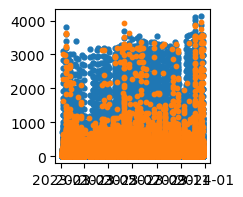

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(2, 2))
plt.scatter( df_call['QUOTE_DATE'], df_call['BS_Call_Price'], s = 12)
plt.scatter( df_call['QUOTE_DATE'], df_call['C_LAST'], s = 10)

In [26]:
import seaborn as sns

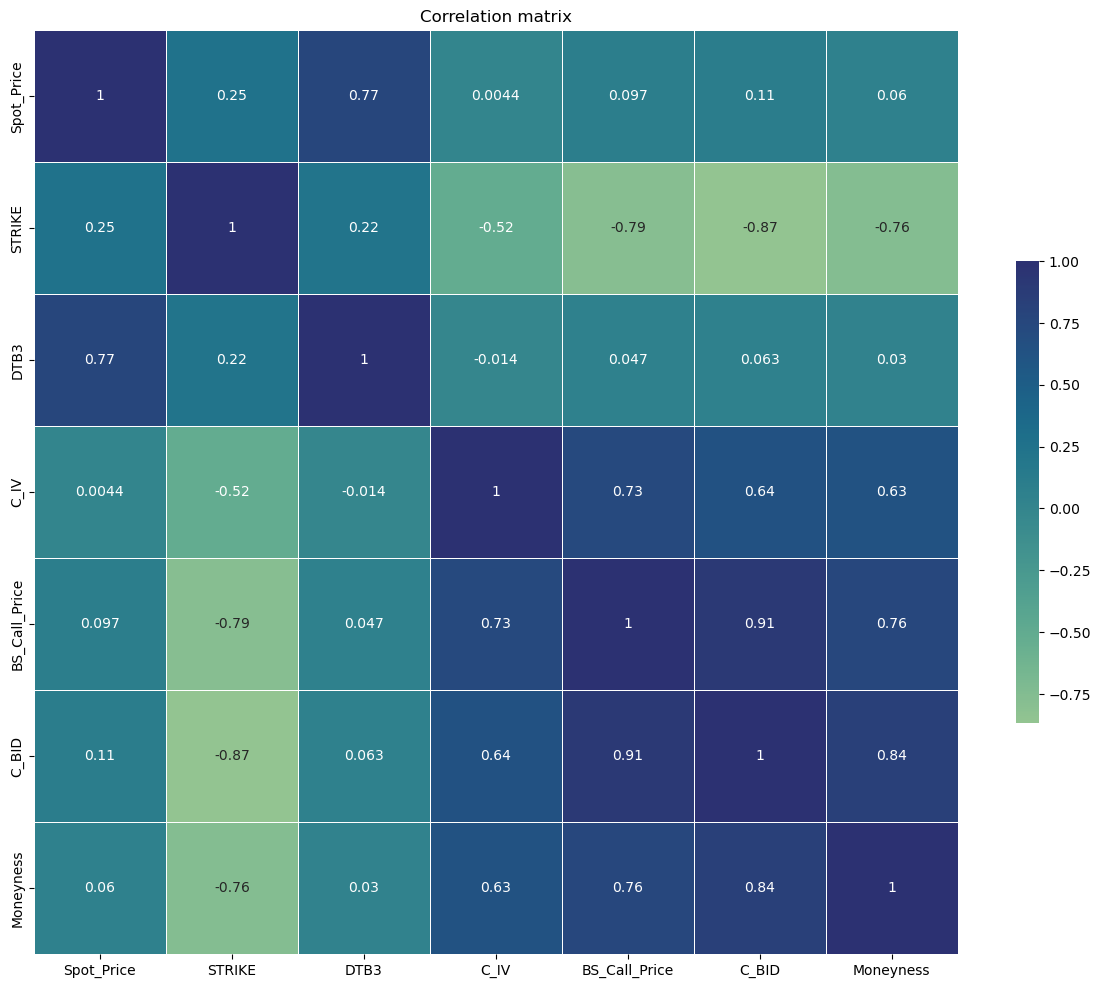

In [27]:
df_call ['Moneyness'] = df_call.apply(lambda row : (row['Spot_Price']/row['STRIKE']), axis =1)
df = df_call[['Spot_Price', 'STRIKE', 'DTB3', 'C_IV', 'BS_Call_Price', 'C_BID', 'Moneyness']]

df = df.apply(pd.to_numeric, errors = 'coerce')

correlation_matrix = df.corr()
plt.figure(figsize= (15,12))

sns.heatmap(correlation_matrix, cmap = 'crest', vmax = 1, center = 0, square = True, linewidth = .5, cbar_kws = {"shrink": .5}, annot = True)
plt.title("Correlation matrix")
plt.show()

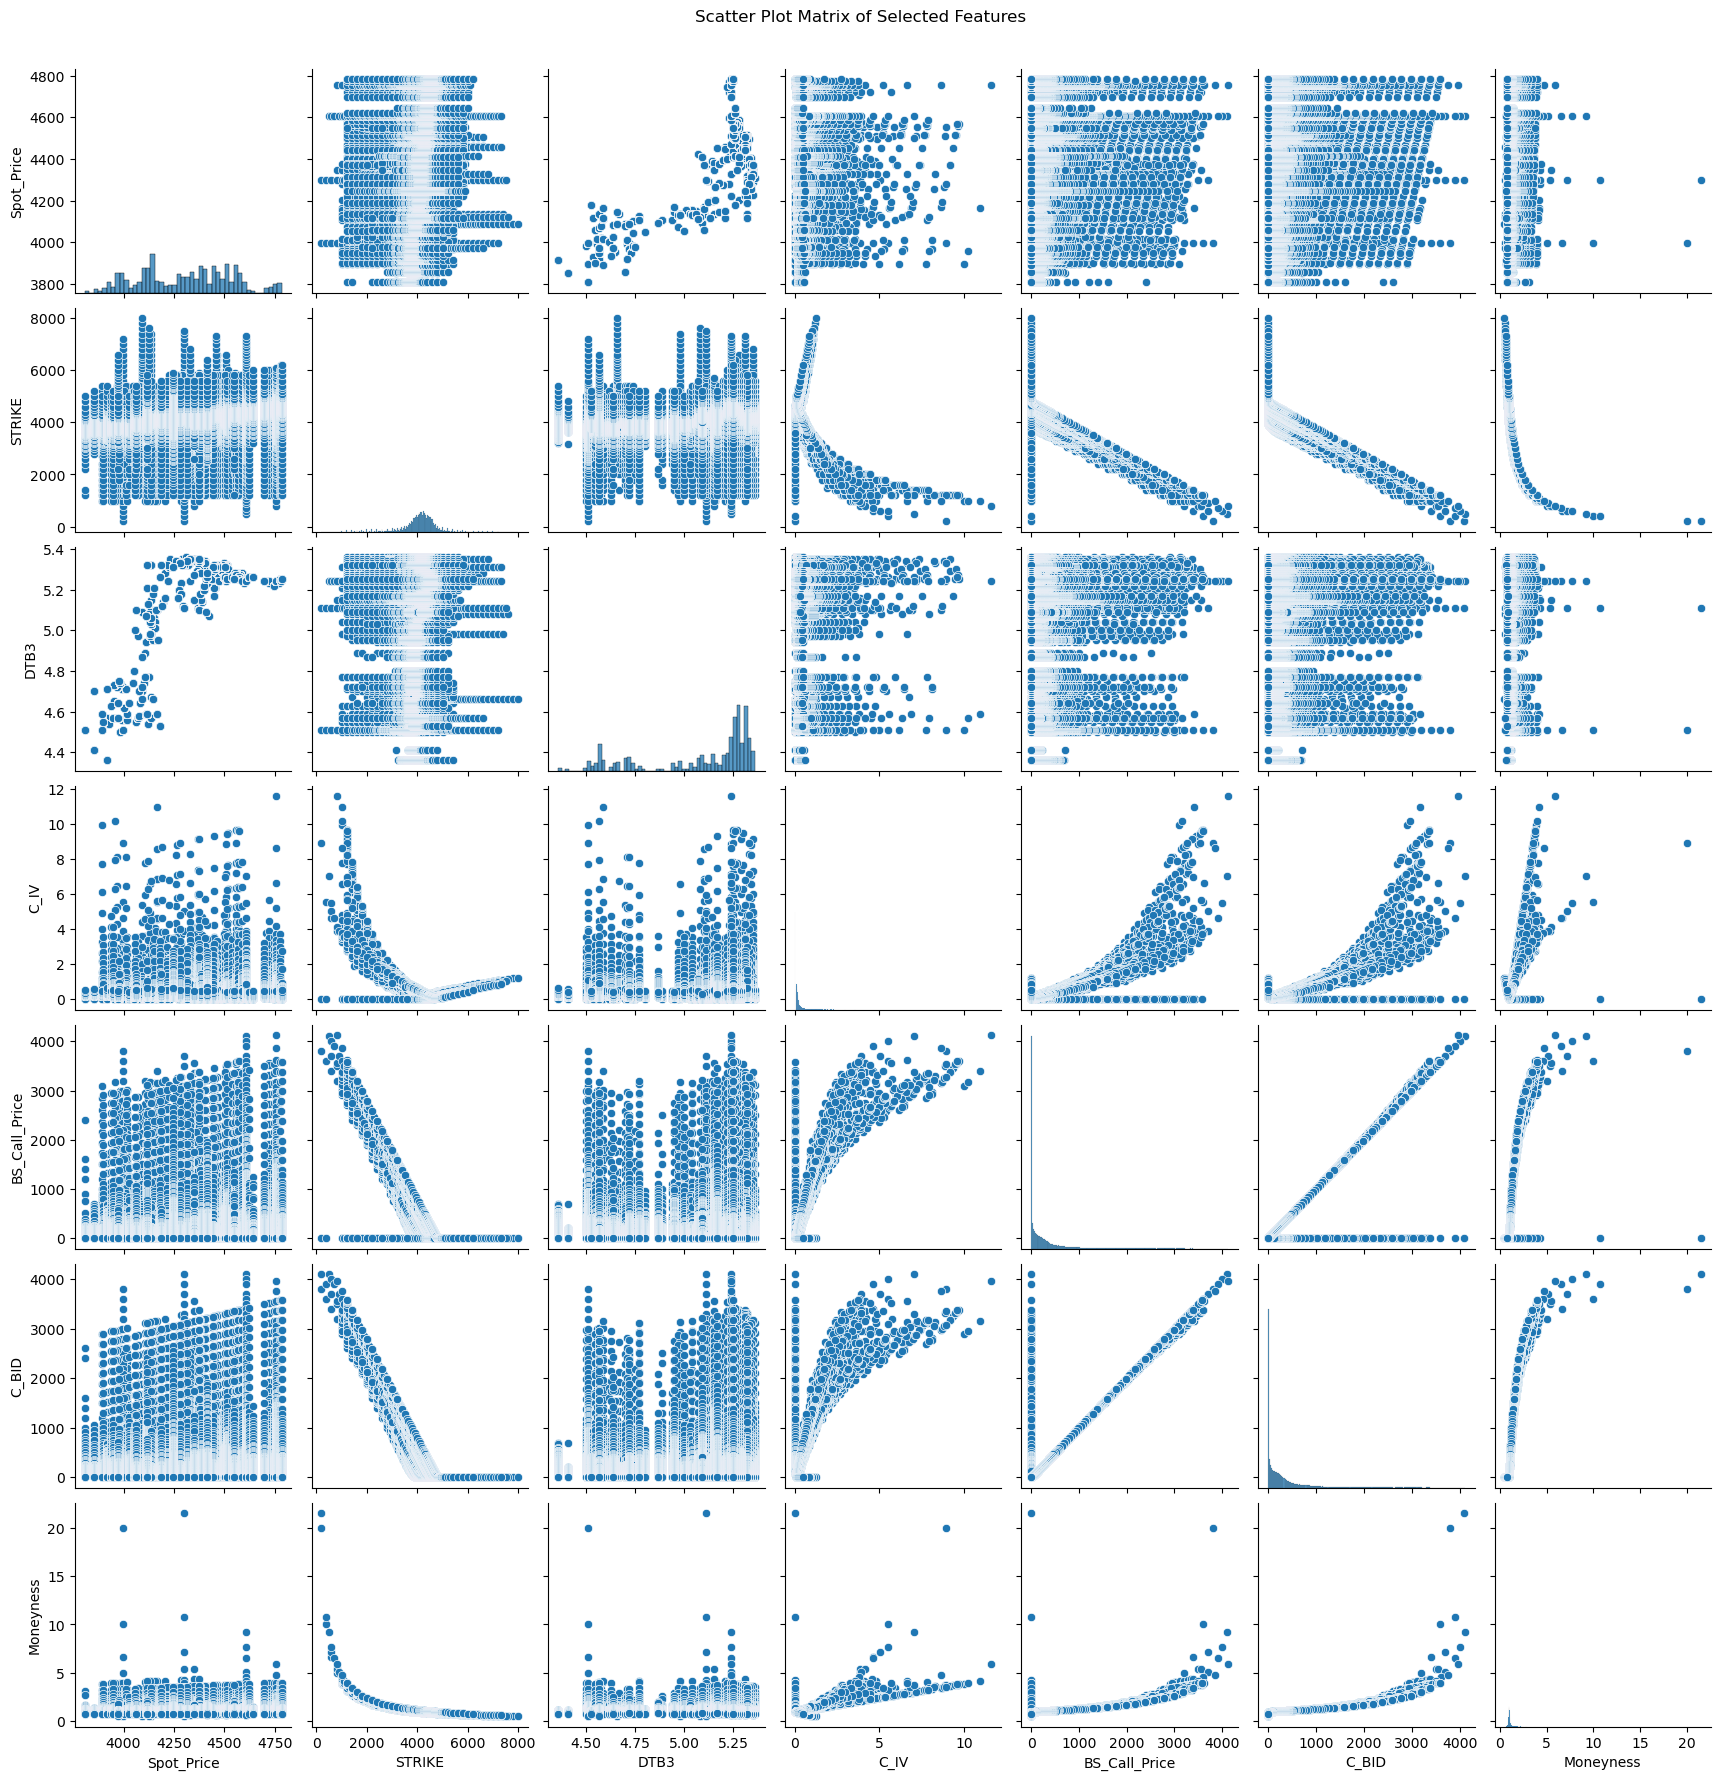

In [28]:
sns.pairplot(df)
plt.suptitle('Scatter Plot Matrix of Selected Features', y=1.02)  # Adjust title positioning
plt.show()

In [29]:
df_filtered = df_call[df_call['C_LAST']!=0]
print(df_call.shape)
print(df_filtered.shape)

(37110, 17)
(25582, 17)


In [30]:
df_filtered

,Spot_Price,STRIKE,DTE,DTB3,C_IV,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,C_LAST,C_BID,C_ASK,QUOTE_DATE,EXPIRE_DATE,BS_Call_Price,Moneyness
38,3852.969971,3660.0,7.0,4.41,0.00062,1.0,0.0,6.53584,0.0,0.0,209.72,192.0,195.4,2023-01-04,2023-01-11,196.064120,1.052724
41,3852.969971,3675.0,7.0,4.41,0.11480,0.99674,0.0001,0.03937,-0.10833,0.77553,195.17,177.3,180.9,2023-01-04,2023-01-11,181.097504,1.048427
46,3852.969971,3700.0,7.0,4.41,0.15953,0.96145,0.00087,0.467,-0.52827,0.75075,121.65,153.7,157.2,2023-01-04,2023-01-11,157.088818,1.041343
47,3852.969971,3705.0,7.0,4.41,0.16171,0.95372,0.00104,0.54047,-0.61129,0.74552,118.2,149.1,152.5,2023-01-04,2023-01-11,152.351230,1.039938
51,3852.969971,3725.0,7.0,4.41,0.17136,0.9147,0.00165,0.86986,-1.01546,0.71847,168.22,131.1,134.6,2023-01-04,2023-01-11,134.008715,1.034354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39162,4783.350098,5100.0,7.0,5.25,0.14684,0.0018,0.00004,0.0385,-0.02837,0.00163,0.27,0.0,0.1,2023-12-28,2024-01-04,0.026572,0.937912
39163,4783.350098,5200.0,7.0,5.25,0.19411,0.00185,0.0,0.04263,-0.04263,0.0019,0.1,0.05,0.1,2023-12-28,2024-01-04,0.039981,0.919875
39165,4783.350098,5400.0,7.0,5.25,0.25146,0.00088,0.00003,0.01303,-0.01601,0.00042,0.05,0.0,0.05,2023-12-28,2024-01-04,0.012450,0.885806
39166,4783.350098,5600.0,7.0,5.25,0.32122,0.00036,0.00004,0.01138,-0.01619,0.0001,0.05,0.0,0.05,2023-12-28,2024-01-04,0.012385,0.854170


In [31]:
import yfinance as yf

start_date = df_filtered['QUOTE_DATE'].min()
end_date = df_filtered['QUOTE_DATE'].max()
vix = yf.Ticker("^VIX")
hist = vix.history(start = start_date, end = end_date)

hist.rename(columns={'Close': 'VIX'}, inplace = True)

hist= hist.reset_index()
hist['Date'] = hist['Date'].dt.tz_localize(None)

df_filtered['QUOTE_DATE'] = pd.to_datetime(df_filtered['QUOTE_DATE'])
df_merged = pd.merge(df_filtered, hist[['Date', 'VIX']], left_on='QUOTE_DATE', right_on='Date', how= 'left')
df_merged.drop(columns=['Date'], inplace=True)
df_merged
                     

,Spot_Price,STRIKE,DTE,DTB3,C_IV,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,C_LAST,C_BID,C_ASK,QUOTE_DATE,EXPIRE_DATE,BS_Call_Price,Moneyness,VIX
0,3852.969971,3660.0,7.0,4.41,0.00062,1.0,0.0,6.53584,0.0,0.0,209.72,192.0,195.4,2023-01-04,2023-01-11,196.064120,1.052724,22.01
1,3852.969971,3675.0,7.0,4.41,0.11480,0.99674,0.0001,0.03937,-0.10833,0.77553,195.17,177.3,180.9,2023-01-04,2023-01-11,181.097504,1.048427,22.01
2,3852.969971,3700.0,7.0,4.41,0.15953,0.96145,0.00087,0.467,-0.52827,0.75075,121.65,153.7,157.2,2023-01-04,2023-01-11,157.088818,1.041343,22.01
3,3852.969971,3705.0,7.0,4.41,0.16171,0.95372,0.00104,0.54047,-0.61129,0.74552,118.2,149.1,152.5,2023-01-04,2023-01-11,152.351230,1.039938,22.01
4,3852.969971,3725.0,7.0,4.41,0.17136,0.9147,0.00165,0.86986,-1.01546,0.71847,168.22,131.1,134.6,2023-01-04,2023-01-11,134.008715,1.034354,22.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25577,4783.350098,5100.0,7.0,5.25,0.14684,0.0018,0.00004,0.0385,-0.02837,0.00163,0.27,0.0,0.1,2023-12-28,2024-01-04,0.026572,0.937912,NaN
25578,4783.350098,5200.0,7.0,5.25,0.19411,0.00185,0.0,0.04263,-0.04263,0.0019,0.1,0.05,0.1,2023-12-28,2024-01-04,0.039981,0.919875,NaN
25579,4783.350098,5400.0,7.0,5.25,0.25146,0.00088,0.00003,0.01303,-0.01601,0.00042,0.05,0.0,0.05,2023-12-28,2024-01-04,0.012450,0.885806,NaN
25580,4783.350098,5600.0,7.0,5.25,0.32122,0.00036,0.00004,0.01138,-0.01619,0.0001,0.05,0.0,0.05,2023-12-28,2024-01-04,0.012385,0.854170,NaN


In [32]:
df_merged.isnull().sum()

Spot_Price         0
STRIKE             0
DTE                0
DTB3               0
C_IV               0
C_DELTA            0
C_GAMMA            0
C_VEGA             0
C_THETA            0
C_RHO              0
C_LAST             0
C_BID              0
C_ASK              0
QUOTE_DATE         0
EXPIRE_DATE        0
BS_Call_Price      0
Moneyness          0
VIX              112
dtype: int64

In [33]:
df = df_merged.dropna(subset= ['VIX'])

In [34]:
df.isnull().sum()

Spot_Price       0
STRIKE           0
DTE              0
DTB3             0
C_IV             0
C_DELTA          0
C_GAMMA          0
C_VEGA           0
C_THETA          0
C_RHO            0
C_LAST           0
C_BID            0
C_ASK            0
QUOTE_DATE       0
EXPIRE_DATE      0
BS_Call_Price    0
Moneyness        0
VIX              0
dtype: int64

Spot_Price              float64
STRIKE                  float64
DTE                     float64
DTB3                    float64
C_IV                    float64
C_DELTA                 float64
C_GAMMA                 float64
C_VEGA                  float64
C_THETA                 float64
C_RHO                   float64
C_LAST                  float64
C_BID                   float64
C_ASK                   float64
QUOTE_DATE       datetime64[ns]
EXPIRE_DATE      datetime64[ns]
BS_Call_Price           float64
Moneyness               float64
VIX                     float64
dtype: object


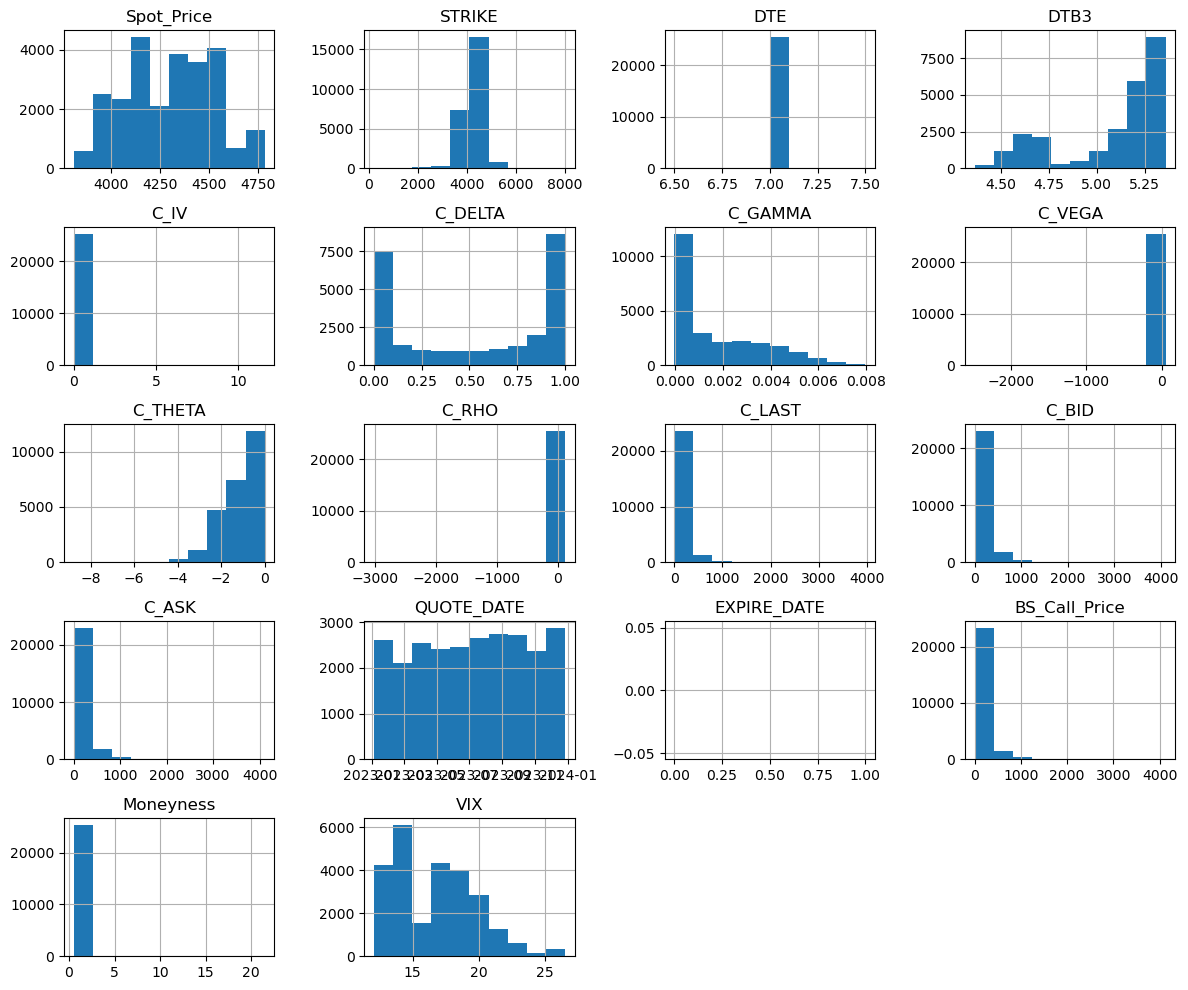

In [35]:
import matplotlib.pyplot as plt

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')
df['EXPIRE_DATE'] = pd.to_datetime(df['EXPIRE_DATE'])
print(df.dtypes)
        
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [37]:
exclude_cols = ['C_LAST', 'DTE', 'QUOTE_DATE', 'EXPIRE_DATE', 'C_THETA', 'Moneyness']
feature_cols =df.columns.difference(exclude_cols)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df[feature_cols], df['C_LAST'], test_size = 0.2, random_state = 42)

skew_columns= ['C_IV', 'C_DELTA', 'C_GAMMA', 'C_VEGA', 'C_RHO']
for col in skew_columns:
    min_pos = X_train[col][X_train[col]>0].min()
    X_train[col] = X_train[col].replace(0, min_pos * 0.1)
    X_train[col] = X_train[col].apply(lambda x: min_pos * 0.1 if x <= 0 else x)
    X_train[col + '_log'] = np.log(X_train[col])
    X_test[col] = X_test[col].replace(0, min_pos * 0.1)
    X_test[col] = X_test[col].apply(lambda x: min_pos * 0.1 if x <= 0 else x)
    X_test[col + '_log'] = np.log(X_test[col])

    X_train.drop(col, axis=1)
    X_test.drop(col, axis=1)

print(X_train.dtypes)
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include= [np.number])
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


models = {
    "Linear Regression": LinearRegression(),
    "Random Forest" : RandomForestRegressor(n_estimators = 100, random_state = 42),
    "Gradient Boosting" : GradientBoostingRegressor(n_estimators = 100, random_state = 42),
    "XGBoost" : XGBRegressor(n_estimators= 100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} MSE: {mse}")
    print(f"{name} R-Squared: {r2}")



BS_Call_Price    float64
C_ASK            float64
C_BID            float64
C_DELTA          float64
C_GAMMA          float64
C_IV             float64
C_RHO            float64
C_VEGA           float64
DTB3             float64
STRIKE           float64
Spot_Price       float64
VIX              float64
C_IV_log         float64
C_DELTA_log      float64
C_GAMMA_log      float64
C_VEGA_log       float64
C_RHO_log        float64
dtype: object
Linear Regression MSE: 8873.885086341234
Linear Regression R-Squared: 0.8878140660575377
Random Forest MSE: 7409.932559482455
Random Forest R-Squared: 0.9063217298231945
Gradient Boosting MSE: 6054.857274265244
Gradient Boosting R-Squared: 0.9234529395419717
XGBoost MSE: 7318.979387250279
XGBoost R-Squared: 0.9074715831819675


In [39]:
def plot_residuals(actual, predicted, title):
    residuals = actual - predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(predicted, residuals, alpha=0.5)
    plt.title(f'Residual Plot for {title}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.grid(True)
    plt.show()

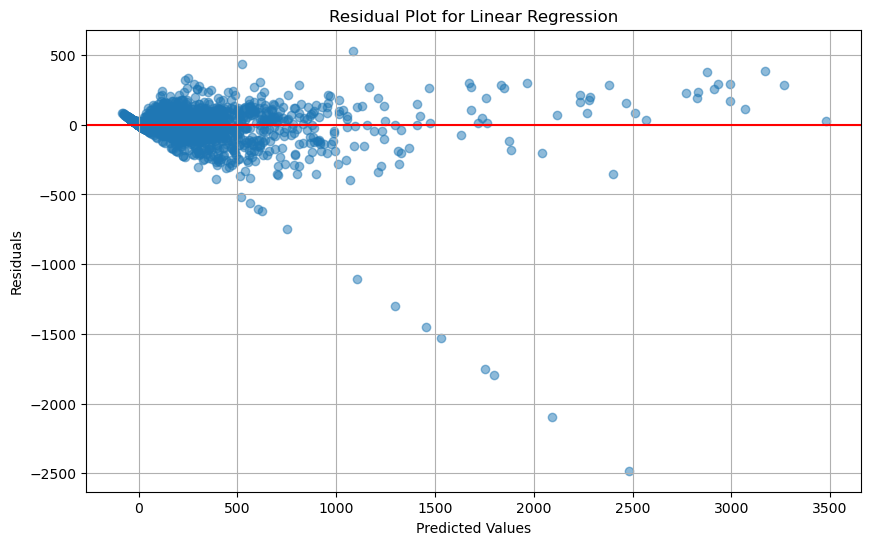

Linear Regression Mean Squared Error: 8873.8851
Linear Regression R-Squared: 0.8878
Cross-validated MSE for Linear Regression: 7386.0518 (+/- 1140.0505)


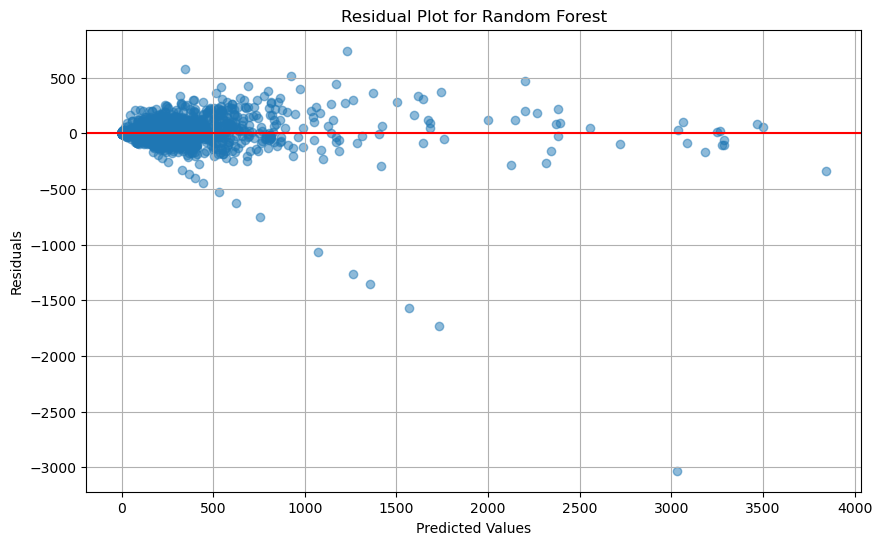

Random Forest Mean Squared Error: 7409.9326
Random Forest R-Squared: 0.9063
Cross-validated MSE for Random Forest: 5901.2184 (+/- 1071.6374)


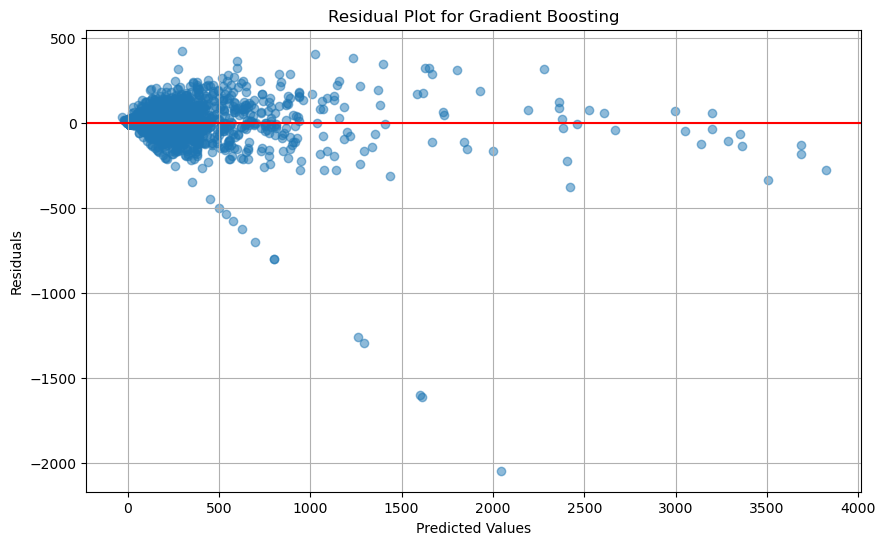

Gradient Boosting Mean Squared Error: 6054.8573
Gradient Boosting R-Squared: 0.9235
Cross-validated MSE for Gradient Boosting: 5591.6943 (+/- 477.8877)


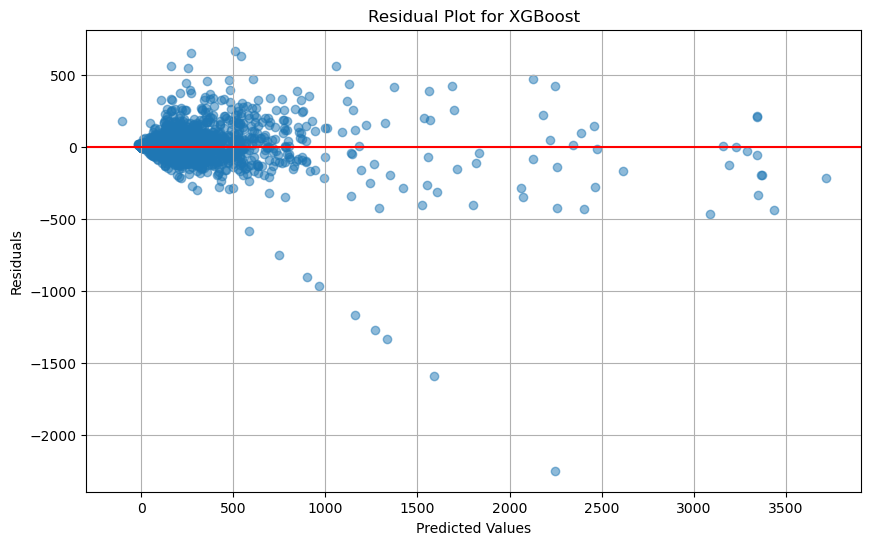

XGBoost Mean Squared Error: 7318.9794
XGBoost R-Squared: 0.9075
Cross-validated MSE for XGBoost: 5332.2181 (+/- 970.7364)


In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor


# Dictionary to store cross-validation results
cross_val_results = {}

for name, model in models.items():
    # Fit model and predict
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Residual plot
    plot_residuals(y_test, y_pred, name)

    # MSE and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Mean Squared Error: {mse:.4f}")
    print(f"{name} R-Squared: {r2:.4f}")

    # Cross-validate MSE
    mse_scores = -cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cross_val_results[name] = mse_scores
    print(f"Cross-validated MSE for {name}: {mse_scores.mean():.4f} (+/- {mse_scores.std():.4f})")